In [10]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [9]:
#Import ratings
columns=['user_id','item_id','rating', 'timestamp']
data= pd.read_csv('u.data', sep='\t',names=columns)

#import movie titles
movies= pd.read_csv('Movie_Id_Titles')

#Merge both datasets
df=pd.merge(data, movies, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [13]:
#Lets explore the data

df.groupby('title')['rating'].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [57]:
#Print some Stats
print(f'Total number of movie titles in this dataset: {df["title"].nunique()} movies')
print(f'Total number of unique viewers in this dataset: {df["user_id"].nunique()} users')

Total number of movie titles in this dataset: 1664 movies
Total number of unique viewers in this dataset: 944 users


In [56]:
#Let us check the rating vs the number of viewers who rated
df.groupby('title')['rating'].aggregate(['mean','count']).sort_values(by='count',ascending=False)

,mean,count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Star Wars (1977)'),
  Text(1, 0, 'Contact (1997)'),
  Text(2, 0, 'Fargo (1996)'),
  Text(3, 0, 'Return of the Jedi (1983)'),
  Text(4, 0, 'Liar Liar (1997)'),
  Text(5, 0, 'English Patient, The (1996)'),
  Text(6, 0, 'Scream (1996)'),
  Text(7, 0, 'Toy Story (1995)'),
  Text(8, 0, 'Air Force One (1997)'),
  Text(9, 0, 'Independence Day (ID4) (1996)'),
  Text(10, 0, 'Raiders of the Lost Ark (1981)'),
  Text(11, 0, 'Godfather, The (1972)'),
  Text(12, 0, 'Pulp Fiction (1994)'),
  Text(13, 0, 'Twelve Monkeys (1995)'),
  Text(14, 0, 'Silence of the Lambs, The (1991)'),
  Text(15, 0, 'Jerry Maguire (1996)'),
  Text(16, 0, 'Chasing Amy (1997)'),
  Text(17, 0, 'Rock, The (1996)'),
  Text(18, 0, 'Empire Strikes Back, The (1980)'),
  Text(19, 0, 'Star Trek: First Contact (1996)'),
  Text(20, 0, 'Back to the Future (1985)'),
  Text(21, 0, 'Titani

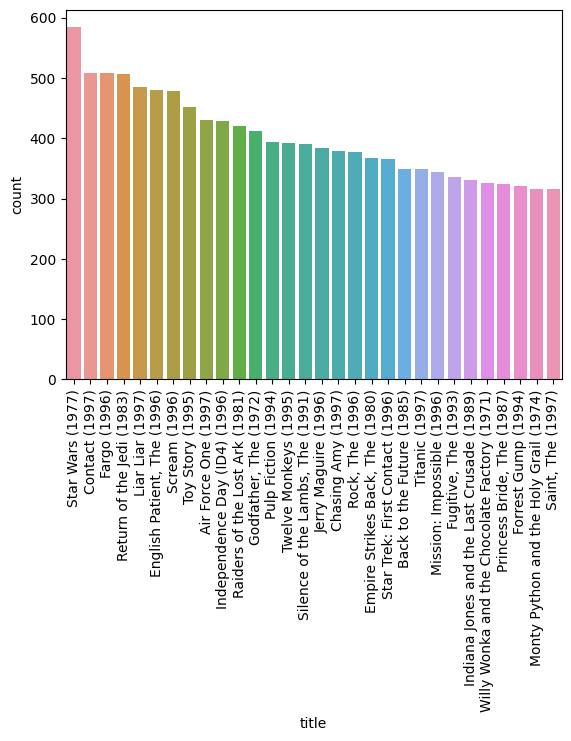

In [54]:
Top30=df.groupby('title')['title'].value_counts().nlargest(30).to_frame(name='count').reset_index()
sns.barplot(x='title', y='count', data=Top30)
plt.xticks(rotation=90)

In [100]:
#Let us investigate the relationship between the ratings and the number of ratings
ratings= pd.DataFrame(df.groupby('title')['rating'].aggregate(['mean','count']))
ratings.rename(columns={'mean':'rating','count':'num of ratings'}, inplace=True)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rating          1664 non-null   float64
 1   num of ratings  1664 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 39.0+ KB


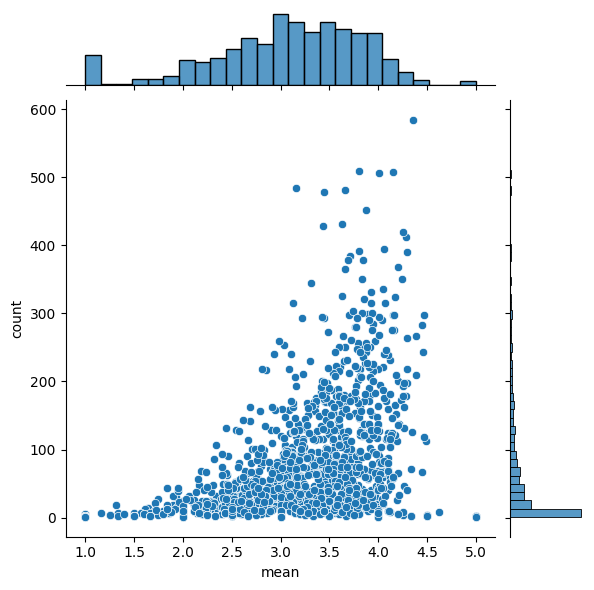

In [63]:

sns.jointplot(x='mean',y='count',data=ratings)

In [65]:
#Lets see how users will recommend movies

moviematrix= df.pivot_table(index='user_id', columns='title',values='rating')
moviematrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
#10 Most recommended movies
ratings.sort_values(by='count', ascending=False).head(10)

,title,mean,count
1398,Star Wars (1977),4.359589,584
333,Contact (1997),3.803536,509
498,Fargo (1996),4.155512,508
1234,Return of the Jedi (1983),4.007890,507
860,Liar Liar (1997),3.156701,485
460,"English Patient, The (1996)",3.656965,481
1284,Scream (1996),3.441423,478
1523,Toy Story (1995),3.878319,452
32,Air Force One (1997),3.631090,431
744,Independence Day (ID4) (1996),3.438228,429


In [69]:
#We pick Star Wars and Toy Story
StarWars_rating= moviematrix['Star Wars (1977)']
ToyStory_rating= moviematrix['Toy Story (1995)']


In [70]:
StarWars_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [71]:
ToyStory_rating.head()

user_id
0    NaN
1    5.0
2    4.0
3    NaN
4    NaN
Name: Toy Story (1995), dtype: float64

In [74]:
similar_to_StarWars= moviematrix.corrwith(StarWars_rating)
similar_to_Toystory= moviematrix.corrwith(ToyStory_rating)

/Users/milena2021/Documents/GitHub/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/milena2021/Documents/GitHub/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [118]:
#Lets convert to Dataframe
corr_starwars= pd.DataFrame(similar_to_StarWars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [78]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [104]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [119]:
#Lets join the num of ratings
corr_starwars=corr_starwars.merge(ratings['num of ratings'], on='title')
corr_starwars



,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
...,...,...
Young Guns (1988),0.186377,101
Young Guns II (1990),0.228615,44
"Young Poisoner's Handbook, The (1995)",-0.007374,41


In [122]:
#Filter for viewings higher than 100
corr_starwars[corr_starwars['num of ratings']>=100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [123]:
corr_toystory=pd.DataFrame(similar_to_Toystory,columns=['Correlation'])
corr_toystory.dropna(inplace=True)
corr_toystory.head(10)

,Correlation
title,
'Til There Was You (1997),0.534522
101 Dalmatians (1996),0.232118
12 Angry Men (1957),0.334943
187 (1997),0.651857
2 Days in the Valley (1996),0.162728
"20,000 Leagues Under the Sea (1954)",0.328472
2001: A Space Odyssey (1968),-0.069060
"39 Steps, The (1935)",0.150055
8 1/2 (1963),-0.117259


In [124]:
corr_toystory.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
Reckless (1995),1.0
"Stranger, The (1994)",1.0
Ladybird Ladybird (1994),1.0
Infinity (1996),1.0
Albino Alligator (1996),1.0
Guantanamera (1994),1.0
Late Bloomers (1996),1.0
Across the Sea of Time (1995),1.0


In [125]:
corr_toystory=corr_toystory.merge(ratings['num of ratings'], on='title')
corr_toystory

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.534522,9
101 Dalmatians (1996),0.232118,109
12 Angry Men (1957),0.334943,125
187 (1997),0.651857,41
2 Days in the Valley (1996),0.162728,93
...,...,...
Young Guns (1988),0.373463,101
Young Guns II (1990),0.146312,44
"Young Poisoner's Handbook, The (1995)",-0.026402,41


In [126]:
corr_toystory[corr_toystory['num of ratings']>=100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
title,,
Toy Story (1995),1.000000,452
"Craft, The (1996)",0.549100,104
Down Periscope (1996),0.457995,101
Miracle on 34th Street (1994),0.456291,101
G.I. Jane (1997),0.454756,175
Amistad (1997),0.449915,124
Beauty and the Beast (1991),0.442960,202
"Mask, The (1994)",0.432855,129
Cinderella (1950),0.428372,129
